In [1]:
SEED_VALUE = 20200313
import os
os.environ['PYTHONHASHSEED']=str(SEED_VALUE)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import random

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
import tensorflow as tf

Using TensorFlow backend.


In [3]:
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [4]:
BATCH_SIZE = 128
NO_EPOCHS = 5
TRAIN_PROP = 0.05

In [5]:
classes = ('def', 'ok')
data_sets = ('train', 'test')
train_dir, test_dir = \
    [next((pathlib.Path.cwd() / '..').rglob(ds)) for ds in data_sets]
for name, folder in zip(data_sets, (train_dir, test_dir)):
    for c in classes:
        path = folder / '{}_front'.format(c)
        no_files = len(list(path.glob('*.jpeg')))
        print('{} set, {} class: {} obs'.format(name, c, no_files))

train set, def class: 3758 obs
train set, ok class: 2875 obs
test set, def class: 453 obs
test set, ok class: 262 obs


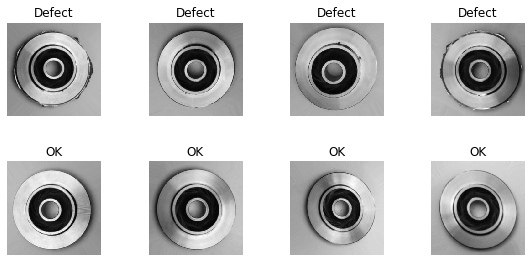

In [6]:
fnames_train = \
    {c: (train_dir / '{}_front'.format(c)).glob('*.jpeg') for c in classes}

no_examples = 4

fig, (r1, r2) = plt.subplots(nrows=2, ncols=no_examples, figsize=(8, 4))
fig.tight_layout()
title = {'def': 'Defect', 'ok': 'OK'}

for row, cls in zip((r1, r2), ('def', 'ok')):
    for col in range(no_examples):
        img = plt.imread(next(fnames_train[cls]))
        row[col].imshow(img)
        row[col].set_axis_off()
        row[col].set_title(title[cls])

plt.show()

In [7]:
trainval_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = trainval_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    seed=SEED_VALUE
)

validation_generator = trainval_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    seed=SEED_VALUE
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    color_mode='grayscale',
    batch_size=1,
    class_mode='binary'
)

Found 5307 images belonging to 2 classes.
Found 1326 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [8]:
model = Sequential()

model.add(
    Conv2D(10, kernel_size=3, input_shape=(300, 300, 1), activation='relu')
)
model.add(MaxPool2D(4))
model.add(
    Conv2D(10, kernel_size=3, input_shape=(300, 300, 1), activation='relu')
)
model.add(MaxPool2D(4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

train_steps, val_steps = [TRAIN_PROP * (g.samples // BATCH_SIZE)
                          for g in (train_generator, validation_generator)]

training = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=train_steps,
    validation_data=validation_generator,
    validation_steps=val_steps,
    epochs=NO_EPOCHS
)

Epoch 1/5
3/2 [===========================================] - 9s 3s/step - loss: 0.6948 - accuracy: 0.4922 - val_loss: 0.6885 - val_accuracy: 0.5781
Epoch 2/5
3/2 [===========================================] - 5s 2s/step - loss: 0.6876 - accuracy: 0.5391 - val_loss: 0.6722 - val_accuracy: 0.6406
Epoch 3/5
3/2 [===========================================] - 6s 2s/step - loss: 0.6741 - accuracy: 0.6016 - val_loss: 0.6980 - val_accuracy: 0.5312
Epoch 4/5
3/2 [===========================================] - 11s 4s/step - loss: 0.6796 - accuracy: 0.5729 - val_loss: 0.6837 - val_accuracy: 0.5469

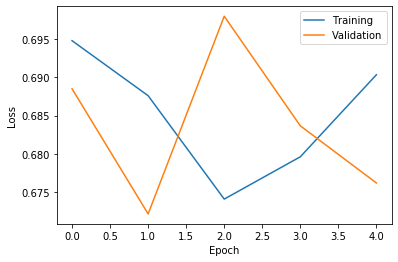

In [10]:
fig, ax = plt.subplots()
ax: plt.Axes
ax.plot(training.history['loss'], label='Training')
ax.plot(training.history['val_loss'], label='Validation')
ax.legend()
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
plt.show()
